## 卷积神经网络用于灰度图像处理
补全当前代码，对灰度图进行平滑卷积

图像位置在 ch5/code/lena512.png

请复制到你个人环境中，使用 Docker 环境的同学可使用 -v 参数挂载本地目录

In [12]:
# 示例代码运行环境
%load_ext watermark
%watermark -p tensorflow,numpy -v -m

CPython 2.7.6
IPython 5.1.0

tensorflow 1.0.1
numpy 1.12.1

compiler   : GCC 4.8.4
system     : Linux
release    : 4.4.0-21-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 4
interpreter: 64bit


In [1]:
%matplotlib inline

In [2]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

In [3]:
# 这里是 Tensorflow 用文件队列的形式进行文件读取的代码
# 文件队列的好处是可以异步读取数据，这样可以『多线程』进行工作
filenames = ['lena512.png']
filename_queue = tf.train.string_input_producer(filenames)

reader = tf.WholeFileReader()
key, value = reader.read(filename_queue)

images = tf.image.decode_png(value, channels=1)

In [21]:
with tf.Session() as sess:
    print(sess.run(tf.random_normal([5,5])))

[[-0.11245641  0.47091088  1.14329958  1.19086218  1.56014884]
 [ 0.44784868  1.08697677  0.35768318 -0.0315068  -0.14915498]
 [-0.86042601  0.55255103  2.09606242 -1.44069147  0.15046819]
 [-0.59686577 -0.48758793 -1.69140935  0.72300899  1.61129737]
 [-1.50752723  0.7753436  -1.00114667 -0.65828222  1.30413556]]


In [26]:
with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    # 文件队列异步读取进队列的一些操作，开始读取
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(coord=coord)
    
    before_image = sess.run(images)
    # 这里得到的其实是一个 512 x 512 x 1 的 numpy 数组
    print(before_image.shape)
    
    # 因为 conv2d 要求的是一个 4维的输入，这里用 expand_dim 扩展一维 (batch)
    input_ = tf.expand_dims(before_image, 0)
    print(input_.shape)
    ## 请在这里完成卷积操作，对图像进行平滑，并保存平滑后的图像。在最后进行展示

    # filter 也可以使用二维矩阵指定之后，用 expand_dims 进行扩展
    # weigh = np.array([0, 1, 0, 1, -4, 1, 0, 1, 0]).reshape(3,3)
    
    # weight 只跟二维面的大小有关，越大越模糊，跟值没太多关系
    # weigh = np.full((20,20), 0.2)
    
    # ----------*----------
    # 注意，这里是变量或常量（Tensor）会报错
    # 无法 eval，可以运行程序
    #weigh = tf.Variable(tf.random_normal([3,3]))
    
    # 试试 constant
    # 程序直接报错
    #weigh = tf.constant(tf.random_normal([3,3]))
    # ----------*----------
    
    # =======*==========
    # 值越大越模糊，二维的面越大
    # 维度是确定的：2，二维空间
    #weigh = tf.random_normal([1,1])    
    #filter_ = tf.expand_dims(tf.expand_dims(weigh, -1), -1)
    
    # 等价与上面两行代码
    filter_ = tf.random_normal([3,3,1,1])
    # =======*==========
    
    input_ = tf.cast(input_, tf.float32)
    filter_ = tf.cast(filter_, tf.float32)
    op = tf.nn.conv2d(input_, filter_, strides=[1, 1, 1, 1], padding='VALID')
    print(op)
    print(filter_.shape)
    print(op.shape)
    #print(op.eval().shape)
    after_image = op.eval()[0, :, :, :]
    #after_image = op[0,:,:,:]
    print(after_image.shape)
    print(after_image)
    # 停止读取
    coord.request_stop()
    coord.join(threads)

(512, 512, 1)
(1, 512, 512, 1)
Tensor("Conv2D_12:0", shape=(1, 510, 510, 1), dtype=float32)
(3, 3, 1, 1)
(1, 510, 510, 1)
(510, 510, 1)
[[[ 683.19915771]
  [ 682.30474854]
  [ 680.56604004]
  ..., 
  [ 718.88085938]
  [ 704.21081543]
  [ 639.87463379]]

 [[ 683.19915771]
  [ 682.30474854]
  [ 680.56604004]
  ..., 
  [ 718.88085938]
  [ 704.21081543]
  [ 639.87463379]]

 [[ 683.19915771]
  [ 682.30474854]
  [ 680.56604004]
  ..., 
  [ 718.88085938]
  [ 704.21081543]
  [ 639.87463379]]

 ..., 
 [[ 201.85157776]
  [ 196.87269592]
  [ 206.93481445]
  ..., 
  [ 400.90499878]
  [ 410.60049438]
  [ 408.67004395]]

 [[ 198.7943573 ]
  [ 215.80371094]
  [ 220.71490479]
  ..., 
  [ 431.64001465]
  [ 431.29653931]
  [ 430.64874268]]

 [[ 189.65681458]
  [ 220.99671936]
  [ 229.74261475]
  ..., 
  [ 427.31951904]
  [ 432.64398193]
  [ 428.82879639]]]


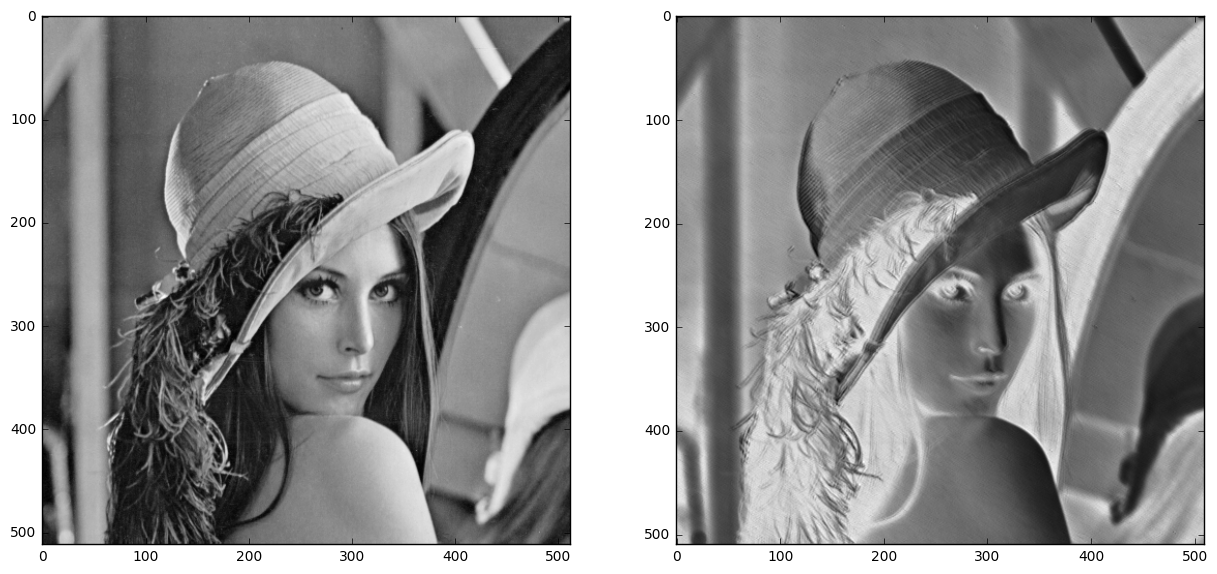

In [18]:
# 模糊
# weight = tf.random_normal([3,3])

fig = plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.imshow(before_image[:, :, 0], cmap='gray')
plt.subplot(1,2,2)
plt.imshow(after_image[:,:,0], cmap='gray')

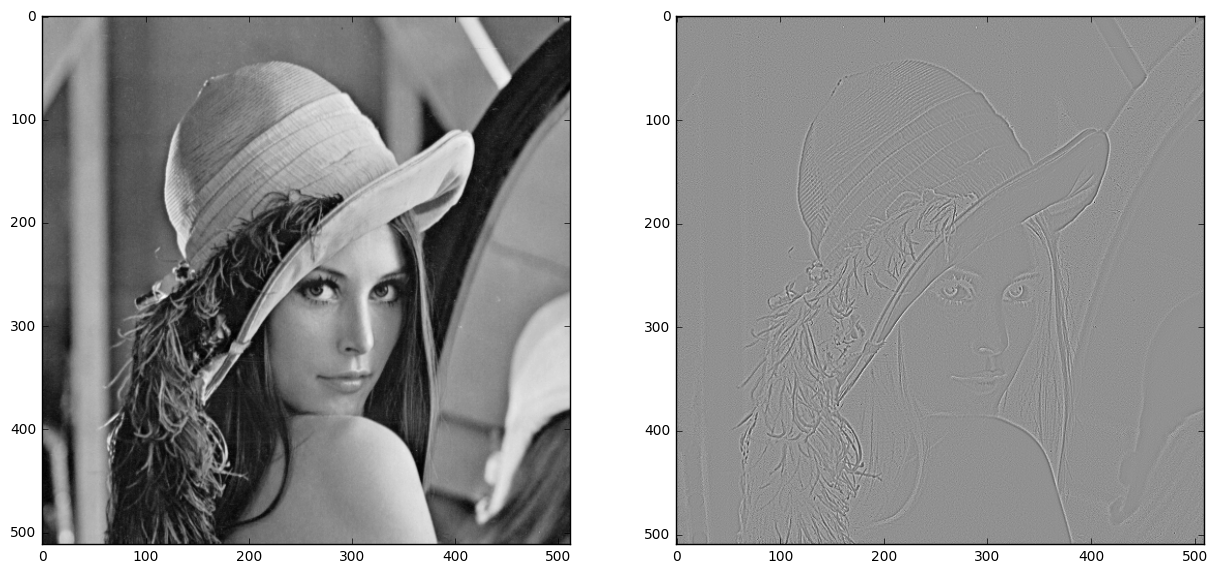

In [51]:
# 边界
# weigh = np.array([0, 1, 0, 1, -4, 1, 0, 1, 0]).reshape(3,3)

fig = plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.imshow(before_image[:, :, 0], cmap='gray')
plt.subplot(1,2,2)
plt.imshow(after_image[:, :, 0], cmap='gray')